In [1]:
import numpy as np
# to get plots displayed in notebook
%matplotlib notebook
import matplotlib.pyplot as plt
from math import pi

In [2]:
# Next, get all data points for models without HALOFIT
# from output .dat files

# after "=" write path to the .dat file with Pk data (..._pk) or Cl data (..._cl)
# Output files (from .ini files above) I used are in PT-check/class/test_output/
# for example, lcdm_pk = "/Users/aizhan.akh/Documents/Projects/PT-check/class/test_output/lcdm_pk.dat"

lcdm_pk = "/u/aizhana/Projects/PT-check/class/output/test/lcdm_pk.dat"               # for LCDM
lcdm_cl = "/u/aizhana/Projects/PT-check/class/output/test/lcdm_cl_lensed.dat"
dmeff0_pk = "/u/aizhana/Projects/PT-check/class/output/test/dmeff_0_pk.dat"               # for IDM with n = 0
dmeff0_cl = "/u/aizhana/Projects/PT-check/class/output/test/dmeff_0_cl_lensed.dat" 
dmeff2_pk = "/u/aizhana/Projects/PT-check/class/output/test/dmeff_2_pk.dat"             # for IDM with n = 2
dmeff2_cl = "/u/aizhana/Projects/PT-check/class/output/test/dmeff_2_cl_lensed.dat" 
dmeff_2_pk = "/u/aizhana/Projects/PT-check/class/output/test/dmeff_-2_pk.dat"             # for IDM with n = -2
dmeff_2_cl = "/u/aizhana/Projects/PT-check/class/output/test/dmeff_-2_cl_lensed.dat" 

lcdm_pk_h = "/u/aizhana/Projects/PT-check/class/output/test/lcdm_pk_nl.dat"
dmeff0_pk_h = "/u/aizhana/Projects/PT-check/class/output/test/dmeff_0_pk_nl.dat"       
dmeff2_pk_h = "/u/aizhana/Projects/PT-check/class/output/test/dmeff_2_pk_nl.dat"       
dmeff_2_pk_h = "/u/aizhana/Projects/PT-check/class/output/test/dmeff_-2_pk_nl.dat"       

# check LCDM model
Pk_lcdm = np.genfromtxt(lcdm_pk)[:,1]
kk_lcdm = np.genfromtxt(lcdm_pk)[:,0]
ll_lcdm = np.genfromtxt(lcdm_cl)[:,0]
clTT_lcdm = np.genfromtxt(lcdm_cl)[:,1]
clPP_lcdm = np.genfromtxt(lcdm_cl)[:,5]
# check Dmeff model w/ n= 0
Pk_dmeff_0 = np.genfromtxt(dmeff0_pk)[:,1]
kk_dmeff_0 = np.genfromtxt(dmeff0_pk)[:,0]
ll_dmeff_0 = np.genfromtxt(dmeff0_cl)[:,0]
clTT_dmeff_0 = np.genfromtxt(dmeff0_cl)[:,1]
clPP_dmeff_0 = np.genfromtxt(dmeff0_cl)[:,5]
# check Dmeff model w/ n= 2
Pk_dmeff_2 = np.genfromtxt(dmeff2_pk)[:,1]
kk_dmeff_2 = np.genfromtxt(dmeff2_pk)[:,0]
ll_dmeff_2 = np.genfromtxt(dmeff2_cl)[:,0]
clTT_dmeff_2 = np.genfromtxt(dmeff2_cl)[:,1]
clPP_dmeff_2 = np.genfromtxt(dmeff2_cl)[:,5]
# check Dmeff model w/ n= -2
Pk_dmeff__2 = np.genfromtxt(dmeff_2_pk)[:,1]
kk_dmeff__2 = np.genfromtxt(dmeff_2_pk)[:,0]
ll_dmeff__2 = np.genfromtxt(dmeff_2_cl)[:,0]
clTT_dmeff__2 = np.genfromtxt(dmeff_2_cl)[:,1]
clPP_dmeff__2 = np.genfromtxt(dmeff_2_cl)[:,5]

# HALOFIT
Pk_lcdm_h = np.genfromtxt(lcdm_pk_h)[:,1]
kk_lcdm_h = np.genfromtxt(lcdm_pk_h)[:,0]
# check Dmeff model w/ n= 0
Pk_dmeff_0_h = np.genfromtxt(dmeff0_pk_h)[:,1]
kk_dmeff_0_h = np.genfromtxt(dmeff0_pk_h)[:,0]
# check Dmeff model w/ n= 2
Pk_dmeff_2_h = np.genfromtxt(dmeff2_pk_h)[:,1]
kk_dmeff_2_h = np.genfromtxt(dmeff2_pk_h)[:,0]
# check Dmeff model w/ n= -2
Pk_dmeff__2_h = np.genfromtxt(dmeff_2_pk_h)[:,1]
kk_dmeff__2_h = np.genfromtxt(dmeff_2_pk_h)[:,0]


In [3]:
from codex import pk_nonlinear as pk

In [4]:
kk, Pk = pk(kk_lcdm, Pk_lcdm)
kk1, Pk1 = pk(kk_dmeff_0, Pk_dmeff_0)
kk2, Pk2 = pk(kk_dmeff_2, Pk_dmeff_2)
kk3, Pk3 = pk(kk_dmeff__2, Pk_dmeff__2)

/usr/licensed/anaconda3/5.2.0/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/usr/licensed/anaconda3/5.2.0/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


In [5]:
# now get spectra with EFT CORRECTIONS

# we want to add Pk to lcdm values which correspond to particular kk values
# so we need to interpolte lcdm values for those particular values of kk
lcdm_interp = np.interp(kk, kk_lcdm, Pk_lcdm)
lcdm_new = Pk + lcdm_interp

# same interpolation with dmeff sets
dmeff0_interp = np.interp(kk1, kk_dmeff_0, Pk_dmeff_0)
dmeff0_new = Pk1 + dmeff0_interp

dmeff2_interp = np.interp(kk2, kk_dmeff_2, Pk_dmeff_2)
dmeff2_new = Pk2 + dmeff2_interp

dmeff_2_interp = np.interp(kk3, kk_dmeff__2, Pk_dmeff__2)
dmeff_2_new = Pk3 + dmeff_2_interp

# calculate residuals

res_new1 = (dmeff0_new-lcdm_new)/lcdm_new
res_new2 = (dmeff2_new-lcdm_new)/lcdm_new
res_new3 = (dmeff_2_new-lcdm_new)/lcdm_new

In [6]:
# save files with corrections
np.savetxt('/u/aizhana/Projects/PT-check/class/output/test/lcdm_pk_eft.dat', np.c_[kk,lcdm_new])
np.savetxt('/u/aizhana/Projects/PT-check/class/output/test/dmeff_0_pk_eft.dat', np.c_[kk1,dmeff0_new])
np.savetxt('/u/aizhana/Projects/PT-check/class/output/test/dmeff_2_pk_eft.dat', np.c_[kk2,dmeff2_new])
np.savetxt('/u/aizhana/Projects/PT-check/class/output/test/dmeff_-2_pk_eft.dat', np.c_[kk3,dmeff_2_new])

In [11]:
# for EFT corrections using merged code

lcdm_pk_h = "/u/aizhana/Projects/CodeCombined/output/dmeff/lcdm_eft_pk_nl_pt.dat"               # for LCDM
dmeff0_pk_h = "/u/aizhana/Projects/CodeCombined/output/dmeff/dmeff_0_eft_pk_nl_pt.dat"               # for IDM with n = 0
dmeff2_pk_h = "/u/aizhana/Projects/CodeCombined/output/dmeff/dmeff_2_eft_pk_nl_pt.dat"             # for IDM with n = 2 
dmeff_2_pk_h = "/u/aizhana/Projects/CodeCombined/output/dmeff/dmeff_-2_eft_pk_nl_pt.dat"             # for IDM with n = -2


# check LCDM model
Pk_lcdm_m = np.genfromtxt(lcdm_pk_h)[:,1]
kk_lcdm_m = np.genfromtxt(lcdm_pk_h)[:,0]
# check Dmeff model w/ n= 0
Pk_dmeff_0_m = np.genfromtxt(dmeff0_pk_h)[:,1]
kk_dmeff_0_m = np.genfromtxt(dmeff0_pk_h)[:,0]
# check Dmeff model w/ n= 2
Pk_dmeff_2_m = np.genfromtxt(dmeff2_pk_h)[:,1]
kk_dmeff_2_m = np.genfromtxt(dmeff2_pk_h)[:,0]
# check Dmeff model w/ n= -2
Pk_dmeff__2_m = np.genfromtxt(dmeff_2_pk_h)[:,1]
kk_dmeff__2_m = np.genfromtxt(dmeff_2_pk_h)[:,0]

<IPython.core.display.Javascript object>


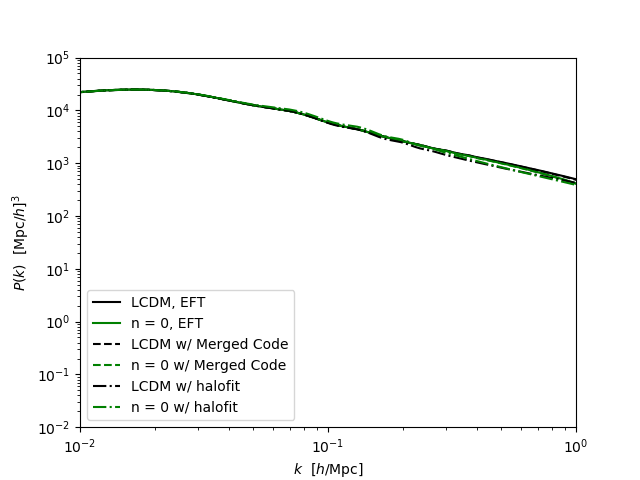

In [27]:
# plots all Pk spectra
plt.figure()
plt.xscale('log');plt.yscale('log');plt.xlim(1.e-2, 1); plt.ylim(1.e-2, 1.e5)
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk, lcdm_new, 'k-',label = "LCDM, EFT")
plt.plot(kk1, dmeff0_new, 'g-',label = "n = 0, EFT")
#plt.plot(kk2, dmeff2_new,'r-', label = "n = 2, EFT")
#plt.plot(kk3, dmeff_2_new,'b--', label = "n = -2, EFT")

plt.plot(kk_lcdm_m,Pk_lcdm_m,'k--', label = "LCDM w/ Merged Code")
plt.plot(kk_dmeff_0_m,Pk_dmeff_0_m,'g--', label = 'n = 0 w/ Merged Code')
#plt.plot(kk_dmeff_2_m,Pk_dmeff_2_m,'r--', label = 'n = 2 w/ Merged Code')
#plt.plot(kk_dmeff__2_m,Pk_dmeff__2_m,'b--', label = 'n = -2 w/ Merged Code')

plt.plot(kk_lcdm_h,Pk_lcdm_h,'k-.', label = "LCDM w/ halofit")
plt.plot(kk_dmeff_0_h,Pk_dmeff_0_h,'g-.', label = 'n = 0 w/ halofit')
#plt.plot(kk_dmeff_2_h,Pk_dmeff_2_h,'b-.', label = 'n = 2 w/ halofit')
#plt.plot(kk_dmeff__2_h,Pk_dmeff__2_h,'y-.', label = 'n = -2 w/ halofit')
plt.legend(loc = "lower left")
#plt.title("")
plt.show()